<center> <h1> <u> <font color='red'> Hands on Training on Bangla Language Processing Collocated with CLBLP'23 </font> </u> </h1> </center>

In [1]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow import keras

CPU times: user 3.27 s, sys: 490 ms, total: 3.76 s
Wall time: 5 s


# Bangla Emotion Dataset 


In [ ]:
!wget -O emotion-train.csv https://www.dropbox.com/s/lbqu5r5l78q541z/bangla-emotion.csv?dl=0

In [4]:
%%time
train = pd.read_csv("emotion-train.csv")
train

CPU times: user 81.8 ms, sys: 8.71 ms, total: 90.5 ms
Wall time: 91.5 ms


,ID,Data,Love,Joy,Surprise,Anger,Sadness,Fear,Topic,Domain,is_admin
0,5454,লকাল বাস ভালো এটা থেকে,0,0,0,0,1,0,Travel,Youtube,False
1,22549,কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ক...,0,0,0,0,1,0,Politics,Youtube,False
2,7033,বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান (৬ ...,0,0,0,1,0,0,Personal,Facebook,False
3,21114,চাচাজি তো কেবল মাকে ধর্ষণ করেছেন,0,0,0,0,1,0,Education,Facebook,False
4,23683,সত্যিকার মানুষ তারাই ভাই,0,1,0,0,0,0,Personal,Youtube,False
...,...,...,...,...,...,...,...,...,...,...,...
18415,25861,সমস্যা নাই ইনশাআল্লাহ আমরা একদিন ক্রিকেট কে শা...,0,1,0,0,0,0,Sports,Youtube,False
18416,27263,খানকিরপুলা তর মাকে গিয়ে বল দেহো দিলা মনটা দিলা...,0,0,0,0,1,0,Music,Youtube,False
18417,13900,ভাই চেয়ার কই🙄,0,0,1,0,0,0,Education,Youtube,False
18418,1208,সবকয়টা তো একই গোয়ালের গাই,0,0,0,0,1,0,Education,Youtube,False


In [28]:
train['enc_label'] = train.Topic.replace({'Personal':0, 'Politics':1, 'Entertainment':2, 'Sports':3, 'Music':4, 'Education':5,
       'Business':6, 'Travel':7, 'Food':8, 'Game':9, 'Fashion':10, 'Health':11})


In [27]:
train.Topic.value_counts().keys()

Index(['Personal', 'Politics', 'Entertainment', 'Sports', 'Music', 'Education',
       'Business', 'Travel', 'Food', 'Game', 'Fashion', 'Health'],
      dtype='object')

In [ ]:
!wget -O emotion-test.csv https://www.dropbox.com/s/ekg83lyo9insnyc/bangla-emotion-test.csv?dl=0

In [ ]:
%%time
test = pd.read_csv("emotion-test.csv")
test

In [29]:

test['enc_label'] = test.Topic.replace({'Personal':0, 'Politics':1, 'Entertainment':2, 'Sports':3, 'Music':4, 'Education':5,
       'Business':6, 'Travel':7, 'Food':8, 'Game':9, 'Fashion':10, 'Health':11})

In [7]:
train.columns

Index(['ID', 'Data', 'Love', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear',
       'Topic', 'Domain', 'is_admin'],
      dtype='object')

In [8]:
number_of_classes = len(train['Topic'].unique())

In [9]:
labels = np.array(train['Topic'])
print('Total size of the dataset : ',len(train))

Total size of the dataset :  18420


In [10]:
## Printing the raw dataset
for i in list(np.random.randint(1,len(train),10)):
  print(train['Data'][i],"\n",train['Topic'][i])

আমি তার বিচার চাই,,  
 Politics
বাপের আমি ছুট পোলা তুমার লাগি পকেট খোলা বাপের ক্যাশে হিসাব মিলে না 😍😍  
 Music
এর ছেয়ে বড় লজ্জা আর হতে পারে না, তবুও তাদেরক তেল মারবে  
 Sports
নাটকটা আমার জন্য ঈদের সেরা উপহার।  
 Entertainment
ওমা আমি আয়মান নাকি??😮  
 Education
আপনার বিডিও মিথ্যা  
 Business
তোমাকে মিস করা  
 Personal
তোমাকে আমি নতুন শাড়ি কিনে দিবনে  
 Education
আগে কার বাল পালাইছেন এখন দরা পর বলতে চেন  
 Politics
ধন্যবাদটা না দিলে অকৃতজ্ঞ হয়ে যাবো | কেননা ভিডিওটা থেকে অনেক উপকৃত হলাম🙂🙂  
 Education


# Data Preprocessing


###Tokenization

In [12]:
%%time
max_words = 100000

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token=None, document_count=0)

tokenizer.fit_on_texts(train['Data'])

CPU times: user 344 ms, sys: 6.12 ms, total: 351 ms
Wall time: 352 ms


### Attributes of Tokenizer
1. word_counts: A dictionary of words and their counts.

2. word_docs: A dictionary of words and how many documents each appeared in.

3. word_index: A dictionary of words and their uniquely assigned integers.

4. document_count:An integer count of the total number of documents that were used to fit the Tokenizer.

By using these attributes we can find the most frequent words and less frequent words and words that might be useful for our system

In [13]:
%%time
word_counts = tokenizer.word_counts
word_docs = tokenizer.word_docs
word_index = tokenizer.word_index
document_count = tokenizer.document_count

print(len(word_counts))

31810
CPU times: user 148 µs, sys: 0 ns, total: 148 µs
Wall time: 121 µs


### Frequency Distribution of Data Length
Here frequency of each length will be counted to find out which lenth size is more appropiate at the time of using pad sequences. we all plot this frequency in histogram to get a visual understanding.

In [14]:
Length_frequency = {}

for i in range(len(train)):
     index = len(train['Data'][i])
     Length_frequency[index] = Length_frequency.get(index, 0)+1


Text(0.5, 1.0, 'Length-Frequency Distribution')

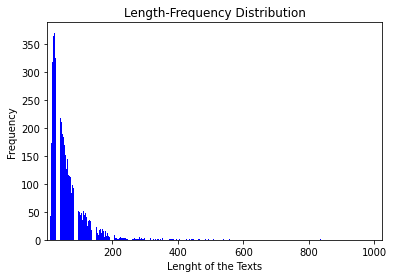

In [15]:
import seaborn as sns

plt.bar(list(Length_frequency.keys()), Length_frequency.values(), color ='b')
plt.xlim(1, 1024)

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')

### Encoding Data into Numbers
To encode our text into numbers we will use  text_to_word_sequence function from keras.

In [17]:
%%time
# Convert string into list of integer indices
train_sequences = tokenizer.texts_to_sequences(train['Data'])
test_sequences = tokenizer.texts_to_sequences(test['Data'])

CPU times: user 388 ms, sys: 1.77 ms, total: 389 ms
Wall time: 422 ms


In [18]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# print(dataset['cleaned'][3])
# print(sequences[1])

Found 31810 unique tokens.


### Pad Sequence
To make all the texts fo the same length we will use pad sequence from keras to standardize their length.

Corpus contain our final processed data and labels contains the labels of associated data.

In [ ]:
%%time
## Before padding length of different training examples 
mx = len(train_sequences[0])
for x in train_sequences:
  mx =max(mx, len(x))
print("Maximum Text length",mx)

##We can also determine maxlen by plotting the frequency distribution of the lengths
train_pad = keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= 100)
## We get the maxlen value from the Length frequency distribution
test_pad = keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= 100)

print(train_pad[1])


In [20]:
print("Shape of the train set: ", train_pad.shape)

# for i in range(2):
#     print(dataset['cleaned'][i],"\n",corpus[i])

Shape of the train set:  (18420, 100)


## CNN with Keras Embedding


In [30]:
# Keras Functional API

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [31]:
keras.backend.clear_session()

max_length = 100
embedding_dim = 64
number_of_classes = len(train['Topic'].unique())

# define CNN model

def CNN():

  input = Input(shape=(max_length,))
  embedding = Embedding(max_words, embedding_dim, input_length = 100)(input)
  conv1 = Conv1D(32,2,activation='relu')(embedding)
  pool1 = MaxPooling1D(2)(conv1)
  flat = Flatten()(pool1)
  output_layer = Dense(number_of_classes, activation='softmax')(flat)
  model = Model(inputs=input, outputs=output_layer)

  return model

# call the model
cnn_model = CNN()

cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 64)           6400000   
                                                                 
 conv1d (Conv1D)             (None, 99, 32)            4128      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 12)                18828     
                                                             

In [34]:
cnn_model.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics =['accuracy'])

In [35]:
%%time
history = cnn_model.fit(train_pad,
                              train['enc_label'],
                              epochs = 10,
                              batch_size = 32,
                              verbose = 1,
                              validation_split =0.1)

Epoch 1/10
519/519 [==============================] - 24s 36ms/step - loss: 0.1495 - accuracy: 0.9596 - val_loss: 2.1744 - val_accuracy: 0.5489
Epoch 2/10
519/519 [==============================] - 6s 12ms/step - loss: 0.0975 - accuracy: 0.9735 - val_loss: 2.3606 - val_accuracy: 0.5581
Epoch 3/10
519/519 [==============================] - 4s 7ms/step - loss: 0.0725 - accuracy: 0.9794 - val_loss: 2.5201 - val_accuracy: 0.5478
Epoch 4/10
519/519 [==============================] - 4s 8ms/step - loss: 0.0567 - accuracy: 0.9838 - val_loss: 2.6344 - val_accuracy: 0.5440
Epoch 5/10
519/519 [==============================] - 4s 8ms/step - loss: 0.0448 - accuracy: 0.9874 - val_loss: 2.7435 - val_accuracy: 0.5418
Epoch 6/10
519/519 [==============================] - 3s 7ms/step - loss: 0.0373 - accuracy: 0.9894 - val_loss: 2.8896 - val_accuracy: 0.5358
Epoch 7/10
519/519 [==============================] - 3s 6ms/step - loss: 0.0319 - accuracy: 0.9919 - val_loss: 3.0510 - val_accuracy: 0.5380
Epo

In [36]:
y_pred = np.argmax(cnn_model.predict(test_pad), axis=-1)
y_pred

71/71 [==============================] - 0s 4ms/step


array([0, 0, 0, ..., 1, 1, 3])

###Performance 

In [38]:
print(classification_report(test['enc_label'],y_pred))

              precision    recall  f1-score   support

           0       0.58      0.59      0.58       572
           1       0.51      0.54      0.52       394
           2       0.50      0.60      0.55       281
           3       0.48      0.50      0.49       294
           4       0.55      0.57      0.56       254
           5       0.51      0.35      0.41       255
           6       0.30      0.38      0.34        74
           7       0.41      0.24      0.30        38
           8       0.28      0.16      0.21        68
           9       0.07      0.03      0.05        29
          10       0.05      0.12      0.07         8
          11       0.00      0.00      0.00         5

    accuracy                           0.50      2272
   macro avg       0.35      0.34      0.34      2272
weighted avg       0.50      0.50      0.50      2272



In [ ]:
confusion_matrix(test['enc_label'],y_pred)

array([[318,   5,  21,  27],
       [  6, 289,   5,  24],
       [ 23,  10, 249,  43],
       [  6,   4,  24,  36]])

# CNN with Glove Word Embedding

[Link](https://github.com/sagorbrur/GloVe-Bengali)


In [ ]:
# download pretrained glove vectors
!wget -O bangla-glove-300d.zip https://www.dropbox.com/s/l70hvnely4y0pbm/bn_glove.39M.300d.zip?dl=0

In [40]:
# extract the zip file and save the files into bangla-digit folder
import zipfile
zip_ref = zipfile.ZipFile("bangla-glove-300d.zip", 'r')
zip_ref.extractall("")
zip_ref.close()

In [41]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file='bn_glove.39M.300d.txt', word2vec_output_file="gensim_glove_vectors.txt")

(178153, 300)

In [42]:
from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)

In [43]:
vocabulary = glove_model.wv.vocab

<ipython-input-43-bee09b2c3f17>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vocabulary = glove_model.wv.vocab


In [ ]:
vocabulary

### Extracting word vector
Now we will extract the word vector. These word vectors will be assainged to the words of our model. 


- `vocabulary`: A list of words exist in the loaded model
- `word_to_vec_map`: dictionary mapping words to their GloVe vector representation.

In [ ]:
%%time

vocabulary = glove_model.wv.vocab
word_to_vec_map = {}

x = "aa"
for w in vocabulary:
  word_to_vec_map[w] = glove_model[w]
  x = w
print(x, word_to_vec_map[x].shape, word_to_vec_map[x]) # From this shape we will get our embedding dimension
print('Size of vocabulary:', len(vocabulary))

### Finding most frequent words
Now we will find some of the most frequent words of the model and similar words to them. That might be useful in future. Just use of some function

In [45]:
%%time
frequent_words = glove_model.wv.index2entity[50:60]
for w in frequent_words:
  print('\n',w)
  similar_words = glove_model.wv.most_similar(w, topn=3)
  for wr, vec in similar_words:
     print(wr, vec)

<timed exec>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
<timed exec>:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



 আছে
রয়েছে 0.5870643854141235
অনেক 0.550443172454834
নেই 0.527860164642334

 একজন
যিনি 0.6538171172142029
ছিলেন 0.571128249168396
ব্যক্তি 0.5518900156021118

 যায়
পাওয়া 0.7962223291397095
গিয়েছিল 0.6485409736633301
পড়ে 0.6365272998809814

 হচ্ছে
করা 0.48764684796333313
যাচ্ছে 0.47582098841667175
এগুলো 0.47380131483078003

 হন
হয়েছিলেন 0.739832878112793
নির্বাচিত 0.6171943545341492
হয়েছেন 0.6106654405593872

 দলের
দল 0.6920536756515503
দলে 0.6245256662368774
দলটির 0.6236886978149414

 বিভিন্ন
নানা 0.6497145891189575
অন্যান্য 0.5586411952972412
বহু 0.5433717966079712

 তা
সেটি 0.5834987163543701
যে 0.5711970329284668
কিন্তু 0.569290280342102

 হয়ে
পড়ে 0.6394785046577454
যায় 0.631236732006073
থাকে 0.582851231098175

 বাংলাদেশ
বাংলাদেশের 0.5982800722122192
মিরপুর১৮ 0.5265884399414062
মিরপুর১৫ 0.525682806968689
CPU times: user 470 ms, sys: 168 ms, total: 638 ms
Wall time: 450 ms


### Creating Embeding Matrix
Now, we will build an embedding matrix that we can load into an Embedding layer. It must be a matrix of shape `(max_words, embedding_dim)`, where each entry i contains
the embedding_dim - dimensional vector for the word of index iin the reference word index. 

In [46]:
max_words = 100000 # Most frequent 100000 words (It should be initialize during tokenization process)
embedding_dim = 300 # embedding dimension of the model

embedding_matrix = np.zeros((max_words, embedding_dim), dtype = float)

c = 0
for word, i in word_index.items():
    if i < max_words:
      embedding_vector = word_to_vec_map.get(word)
      if embedding_vector is None:
          c +=1;
          #print(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
# Words not found in the pretrained model is assigned as zeros
print("Number of words not in the vocabulary: ", c)
print("Percentage of words not in the vocabulary: ", (c/max_words)*100)

Number of words not in the vocabulary:  15424
Percentage of words not in the vocabulary:  15.424


###Checkpoint

In [47]:
''' Callbacks with Checkpoint'''

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "mymodel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint] 


### Defining the Model


In [48]:
keras.backend.clear_session()

max_length = 100
embedding_dim = 300
number_of_classes = len(train['Topic'].unique())

# define CNN model

def CNN():

  input = Input(shape=(max_length,))
  embedding = Embedding(max_words, embedding_dim, input_length = 100, weights=[embedding_matrix], trainable=False)(input)
  conv1 = Conv1D(32,2,activation='relu')(embedding)
  pool1 = MaxPooling1D(2)(conv1)
  flat = Flatten()(pool1)
  output_layer = Dense(number_of_classes, activation='softmax')(flat)
  model = Model(inputs=input, outputs=output_layer)

  return model

# call the model
cnn_model_pretrained = CNN()

cnn_model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          30000000  
                                                                 
 conv1d (Conv1D)             (None, 99, 32)            19232     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 12)                18828     
                                                             

In [49]:
cnn_model_pretrained.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics =['accuracy'])

In [50]:
%%time
history = cnn_model_pretrained.fit(train_pad,
                              train['enc_label'],
                              epochs = 10,
                              batch_size = 32,
                              verbose = 1,
                              validation_split =0.1,
                              callbacks = callback_list)

Epoch 1/10
519/519 [==============================] - ETA: 0s - loss: 1.7737 - accuracy: 0.3988
Epoch 1: val_accuracy improved from -inf to 0.45874, saving model to mymodel.h5
519/519 [==============================] - 5s 6ms/step - loss: 1.7737 - accuracy: 0.3988 - val_loss: 1.6267 - val_accuracy: 0.4587
Epoch 2/10
509/519 [============================>.] - ETA: 0s - loss: 1.4755 - accuracy: 0.5121
Epoch 2: val_accuracy improved from 0.45874 to 0.50054, saving model to mymodel.h5
519/519 [==============================] - 2s 4ms/step - loss: 1.4742 - accuracy: 0.5128 - val_loss: 1.5381 - val_accuracy: 0.5005
Epoch 3/10
514/519 [============================>.] - ETA: 0s - loss: 1.3456 - accuracy: 0.5516
Epoch 3: val_accuracy improved from 0.50054 to 0.50760, saving model to mymodel.h5
519/519 [==============================] - 2s 4ms/step - loss: 1.3460 - accuracy: 0.5513 - val_loss: 1.5043 - val_accuracy: 0.5076
Epoch 4/10
509/519 [============================>.] - ETA: 0s - loss: 1.2

In [51]:
# Recreate the exact same model purely from the file:
model = load_model("mymodel.h5")

In [52]:
y_pred = np.argmax(model.predict(test_pad), axis=-1)
y_pred

71/71 [==============================] - 0s 2ms/step


array([0, 0, 0, ..., 1, 1, 3])

###Performance 

In [53]:
print(classification_report(test['enc_label'],y_pred))

              precision    recall  f1-score   support

           0       0.53      0.65      0.58       572
           1       0.46      0.57      0.51       394
           2       0.56      0.43      0.48       281
           3       0.51      0.54      0.52       294
           4       0.64      0.48      0.55       254
           5       0.28      0.33      0.30       255
           6       0.58      0.20      0.30        74
           7       0.43      0.24      0.31        38
           8       0.37      0.10      0.16        68
           9       0.25      0.03      0.06        29
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         5

    accuracy                           0.49      2272
   macro avg       0.38      0.30      0.31      2272
weighted avg       0.49      0.49      0.48      2272



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
confusion_matrix(test['enc_label'],y_pred)

array([[369,  60,  22,  27,  16,  64,   2,   3,   7,   2,   0,   0],
       [ 67, 224,  17,  38,   7,  35,   1,   3,   2,   0,   0,   0],
       [ 48,  39, 120,  22,  18,  31,   1,   1,   1,   0,   0,   0],
       [ 42,  44,  11, 159,   6,  32,   0,   0,   0,   0,   0,   0],
       [ 44,  31,  18,  20, 121,  13,   1,   3,   1,   1,   1,   0],
       [ 63,  56,  15,  21,  12,  83,   3,   1,   1,   0,   0,   0],
       [ 23,  11,   2,   5,   2,  15,  15,   1,   0,   0,   0,   0],
       [ 12,   4,   2,   6,   1,   3,   1,   9,   0,   0,   0,   0],
       [ 18,   8,   6,  12,   2,  15,   0,   0,   7,   0,   0,   0],
       [ 13,   0,   1,   4,   3,   6,   1,   0,   0,   1,   0,   0],
       [  2,   2,   1,   0,   1,   1,   1,   0,   0,   0,   0,   0],
       [  1,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

# BiLSTM

In [58]:
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D, Bidirectional, LSTM, GRU
keras.backend.clear_session()

max_length = 100
embedding_dim = 64
number_of_classes = len(train['Topic'].unique())

# define bilstm model

def lstm():


   ###### BiLSTM Model #######
  bi_text_inputs = Input(shape=(max_length,))
  bi_embedding_layer = Embedding(max_words,embedding_dim)(bi_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
  bi_dense_layer_1 = Dense(number_of_classes, activation='softmax')(LSTM_Layer_1)
  bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)


  return bilstm_model

# call the model
lstm_model = lstm()

lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 64)           6400000   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dense (Dense)               (None, 12)                780       
                                                                 
Total params: 6,425,612
Trainable params: 6,425,612
Non-trainable params: 0
_________________________________________________________________


In [59]:
lstm_model.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics =['accuracy'])

In [60]:
%%time
history = lstm_model.fit(train_pad,
                              train['enc_label'],
                              epochs = 10,
                              batch_size = 32,
                              verbose = 1,
                              validation_split =0.1)

Epoch 1/10
519/519 [==============================] - 28s 45ms/step - loss: 1.7497 - accuracy: 0.4040 - val_loss: 1.4810 - val_accuracy: 0.5065
Epoch 2/10
519/519 [==============================] - 10s 19ms/step - loss: 1.0372 - accuracy: 0.6834 - val_loss: 1.3650 - val_accuracy: 0.5755
Epoch 3/10
519/519 [==============================] - 7s 13ms/step - loss: 0.5629 - accuracy: 0.8353 - val_loss: 1.4779 - val_accuracy: 0.5744
Epoch 4/10
519/519 [==============================] - 8s 16ms/step - loss: 0.3284 - accuracy: 0.9078 - val_loss: 1.6530 - val_accuracy: 0.5657
Epoch 5/10
519/519 [==============================] - 7s 14ms/step - loss: 0.2093 - accuracy: 0.9422 - val_loss: 1.8587 - val_accuracy: 0.5353
Epoch 6/10
519/519 [==============================] - 7s 14ms/step - loss: 0.1525 - accuracy: 0.9577 - val_loss: 1.9468 - val_accuracy: 0.5527
Epoch 7/10
519/519 [==============================] - 7s 13ms/step - loss: 0.1133 - accuracy: 0.9696 - val_loss: 2.0370 - val_accuracy: 0.55

In [62]:
y_pred = np.argmax(lstm_model.predict(test_pad), axis=-1)
y_pred

71/71 [==============================] - 2s 6ms/step


array([5, 0, 0, ..., 1, 1, 3])

###Performance 

In [63]:
print(classification_report(test['enc_label'],y_pred))

              precision    recall  f1-score   support

           0       0.57      0.58      0.58       572
           1       0.52      0.55      0.53       394
           2       0.56      0.53      0.54       281
           3       0.50      0.50      0.50       294
           4       0.56      0.56      0.56       254
           5       0.42      0.41      0.42       255
           6       0.38      0.41      0.39        74
           7       0.26      0.37      0.30        38
           8       0.47      0.26      0.34        68
           9       0.15      0.17      0.16        29
          10       0.08      0.12      0.10         8
          11       0.00      0.00      0.00         5

    accuracy                           0.51      2272
   macro avg       0.37      0.37      0.37      2272
weighted avg       0.51      0.51      0.51      2272



In [ ]:
confusion_matrix(test['enc_label'],y_pred)

array([[369,  60,  22,  27,  16,  64,   2,   3,   7,   2,   0,   0],
       [ 67, 224,  17,  38,   7,  35,   1,   3,   2,   0,   0,   0],
       [ 48,  39, 120,  22,  18,  31,   1,   1,   1,   0,   0,   0],
       [ 42,  44,  11, 159,   6,  32,   0,   0,   0,   0,   0,   0],
       [ 44,  31,  18,  20, 121,  13,   1,   3,   1,   1,   1,   0],
       [ 63,  56,  15,  21,  12,  83,   3,   1,   1,   0,   0,   0],
       [ 23,  11,   2,   5,   2,  15,  15,   1,   0,   0,   0,   0],
       [ 12,   4,   2,   6,   1,   3,   1,   9,   0,   0,   0,   0],
       [ 18,   8,   6,  12,   2,  15,   0,   0,   7,   0,   0,   0],
       [ 13,   0,   1,   4,   3,   6,   1,   0,   0,   1,   0,   0],
       [  2,   2,   1,   0,   1,   1,   1,   0,   0,   0,   0,   0],
       [  1,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

#BiLSTM + Attention

In [66]:
from tensorflow.keras.layers import Concatenate

In [64]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
          
        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
          
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [67]:
sequence_input = Input(shape=(max_length,), dtype="int32")
embedded_sequences = Embedding(max_words,embedding_dim)(sequence_input)
     

#conv = Convolution1D(128,5,activation='relu')(embedded_sequences)
#pol = GlobalMaxPool1D()(conv)

lstm = Bidirectional(LSTM(64, return_sequences = True), name="bi_lstm_0")(embedded_sequences)

# Getting our LSTM outputs
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(64, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)
     

state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
context_vector, attention_weights = Attention(20)(lstm, state_h)
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.1)(dense1)
output = Dense(number_of_classes, activation="softmax")(dropout)
  
model = keras.Model(inputs=sequence_input, outputs=output)

In [68]:
model.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics =['accuracy'])

In [69]:
%%time
history = model.fit(train_pad,
                              train['enc_label'],
                              epochs = 10,
                              batch_size = 32,
                              verbose = 1,
                              validation_split =0.1)

Epoch 1/10
519/519 [==============================] - 40s 59ms/step - loss: 2.0041 - accuracy: 0.2584 - val_loss: 1.8566 - val_accuracy: 0.2894
Epoch 2/10
519/519 [==============================] - 14s 27ms/step - loss: 1.5618 - accuracy: 0.4393 - val_loss: 1.5500 - val_accuracy: 0.4490
Epoch 3/10
519/519 [==============================] - 14s 26ms/step - loss: 1.1128 - accuracy: 0.6088 - val_loss: 1.5460 - val_accuracy: 0.5147
Epoch 4/10
519/519 [==============================] - 15s 28ms/step - loss: 0.7525 - accuracy: 0.7587 - val_loss: 1.6479 - val_accuracy: 0.5396
Epoch 5/10
519/519 [==============================] - 12s 23ms/step - loss: 0.5148 - accuracy: 0.8403 - val_loss: 1.8363 - val_accuracy: 0.5385
Epoch 6/10
519/519 [==============================] - 12s 24ms/step - loss: 0.3670 - accuracy: 0.8887 - val_loss: 1.9170 - val_accuracy: 0.5402
Epoch 7/10
519/519 [==============================] - 12s 23ms/step - loss: 0.2784 - accuracy: 0.9198 - val_loss: 2.0497 - val_accuracy:

In [70]:
y_pred = np.argmax(model.predict(test_pad), axis=-1)
y_pred

71/71 [==============================] - 2s 9ms/step


array([0, 0, 0, ..., 1, 1, 3])

###Performance 

In [71]:
print(classification_report(test['enc_label'],y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       572
           1       0.55      0.48      0.51       394
           2       0.55      0.53      0.54       281
           3       0.46      0.52      0.48       294
           4       0.58      0.60      0.59       254
           5       0.43      0.42      0.43       255
           6       0.34      0.27      0.30        74
           7       0.28      0.29      0.29        38
           8       0.35      0.26      0.30        68
           9       0.11      0.14      0.12        29
          10       0.08      0.12      0.10         8
          11       0.00      0.00      0.00         5

    accuracy                           0.51      2272
   macro avg       0.36      0.36      0.36      2272
weighted avg       0.51      0.51      0.51      2272



In [72]:
confusion_matrix(test['enc_label'],y_pred)

array([[359,  41,  25,  44,  22,  51,   6,   8,   3,  10,   2,   1],
       [ 59, 191,  23,  59,  27,  21,   4,   4,   4,   1,   1,   0],
       [ 30,  26, 150,  22,  22,  23,   3,   1,   4,   0,   0,   0],
       [ 43,  39,  19, 152,  15,  14,   5,   2,   0,   4,   0,   1],
       [ 24,  18,  24,  10, 153,  10,   2,   3,   3,   6,   1,   0],
       [ 49,  22,  19,  25,   9, 108,   2,   1,  10,   5,   4,   1],
       [ 15,   3,   2,   7,   5,   7,  20,   5,   5,   3,   2,   0],
       [  9,   2,   2,   2,   4,   1,   5,  11,   2,   0,   0,   0],
       [  6,   4,   7,   5,   5,  12,   5,   3,  18,   2,   1,   0],
       [  8,   0,   2,   5,   2,   3,   4,   0,   0,   4,   1,   0],
       [  0,   1,   0,   1,   0,   1,   2,   0,   2,   0,   1,   0],
       [  1,   1,   0,   1,   0,   0,   1,   1,   0,   0,   0,   0]])

#BERT

In [ ]:
pip install ktrain

In [74]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [75]:
import ktrain
from ktrain import text

In [77]:
X_train = train['Data'].tolist()
y_train = train['Topic'].tolist()

X_valid = test['Data'].tolist()
y_valid = test['Topic'].tolist()

# X_test = test_dataset['cleaned'].tolist()
#y_test = test_data['label'].tolist()

In [78]:
categories = train.Topic.value_counts().keys()
categories = categories.tolist()
categories

['Personal',
 'Politics',
 'Entertainment',
 'Sports',
 'Music',
 'Education',
 'Business',
 'Travel',
 'Food',
 'Game',
 'Fashion',
 'Health']

In [79]:
model_name = 'csebuetnlp/banglabert'
trans = text.Transformer(model_name,maxlen=60,class_names=categories)

In [80]:
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_valid,y_valid)
#test = trans.preprocess_test(X_test,y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 10
	95percentile : 26
	99percentile : 46


/usr/local/lib/python3.8/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 11
	95percentile : 26
	99percentile : 44


In [81]:
model = trans.get_classifier()

/usr/local/lib/python3.8/dist-packages/ktrain/text/preprocessor.py:1093: UserWarning: Could not load a Tensorflow version of model. (If this worked before, it might be an out-of-memory issue.) Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  warnings.warn(


In [83]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=32)

In [84]:
learner.fit_onecycle(2e-5,5)     #2e-5        



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
576/576 [==============================] - 259s 411ms/step - loss: 2.0946 - accuracy: 0.2968 - val_loss: 1.7657 - val_accuracy: 0.4256
Epoch 2/5
576/576 [==============================] - 231s 401ms/step - loss: 1.4672 - accuracy: 0.5396 - val_loss: 1.4073 - val_accuracy: 0.5414
Epoch 3/5
576/576 [==============================] - 230s 400ms/step - loss: 1.1641 - accuracy: 0.6313 - val_loss: 1.2940 - val_accuracy: 0.5823
Epoch 4/5
 22/576 [>.............................] - ETA: 3:32 - loss: 0.9147 - accuracy: 0.7202

KeyboardInterrupt: ignored

In [85]:
learner.validate(class_names=categories)

71/71 [==============================] - 15s 142ms/step
               precision    recall  f1-score   support

     Personal       0.57      0.18      0.27        74
     Politics       0.44      0.42      0.43       255
Entertainment       0.55      0.62      0.58       281
       Sports       0.00      0.00      0.00         8
        Music       0.38      0.34      0.36        68
    Education       0.00      0.00      0.00        29
     Business       0.00      0.00      0.00         5
       Travel       0.61      0.60      0.61       254
         Food       0.65      0.73      0.69       572
         Game       0.56      0.67      0.61       394
      Fashion       0.65      0.57      0.61       294
       Health       0.36      0.11      0.16        38

     accuracy                           0.58      2272
    macro avg       0.40      0.35      0.36      2272
 weighted avg       0.57      0.58      0.57      2272



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 13,  15,   1,   0,  13,   0,   0,   7,  12,   9,   3,   1],
       [  2, 108,  26,   0,   3,   0,   0,   9,  56,  39,  11,   1],
       [  0,  12, 175,   0,   1,   0,   0,  30,  34,  21,   8,   0],
       [  0,   0,   0,   0,   6,   0,   0,   0,   1,   1,   0,   0],
       [  0,  12,  15,   0,  23,   0,   0,   5,   6,   5,   1,   1],
       [  1,   5,   2,   0,   2,   0,   0,   3,  12,   1,   3,   0],
       [  1,   1,   0,   0,   0,   0,   0,   0,   1,   2,   0,   0],
       [  1,  12,  33,   0,   1,   0,   0, 153,  29,  14,  10,   1],
       [  1,  34,  32,   0,   2,   0,   0,  16, 418,  52,  17,   0],
       [  0,  22,  16,   0,   2,   0,   0,  14,  39, 263,  36,   2],
       [  1,  17,  17,   0,   0,   0,   0,  11,  23,  55, 169,   1],
       [  3,   5,   1,   0,   7,   0,   0,   1,   9,   6,   2,   4]])